In [84]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

In [85]:
file_path= "HousingData.csv"
df= pd.read_csv(file_path)

In [86]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [87]:
df_shape = df.shape
df_shape

(506, 14)

In [88]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [90]:
df.isnull().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [91]:
df['CRIM'] = SimpleImputer(strategy="mean").fit_transform(df[['CRIM']])   # Ortalama
df['ZN'] = SimpleImputer(strategy="median").fit_transform(df[['ZN']])     # Medyan

df['DIS'] = KNNImputer(n_neighbors=5).fit_transform(df[['DIS']])  # KNN ile doldurma


In [92]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [93]:
knn_imputer = KNNImputer(n_neighbors=5)

df[['CHAS']] = knn_imputer.fit_transform(df[['CHAS']])
df['CHAS'] = df['CHAS'].round().astype(int) 

In [94]:

df['INDUS'] = SimpleImputer(strategy="median").fit_transform(df[['INDUS']])
df['AGE'] = SimpleImputer(strategy="mean").fit_transform(df[['AGE']])
df['LSTAT'] = KNNImputer(n_neighbors=5).fit_transform(df[['LSTAT']])
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [95]:
cleaned_file_path = "Boston_Housing_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

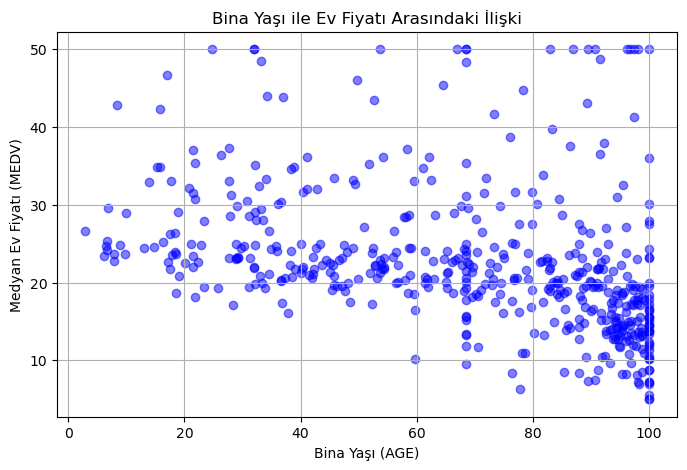

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df['AGE'], df['MEDV'], alpha=0.5, color='blue')
plt.xlabel("Bina Yaşı (AGE)")
plt.ylabel("Medyan Ev Fiyatı (MEDV)")
plt.title("Bina Yaşı ile Ev Fiyatı Arasındaki İlişki")
plt.grid(True)
plt.show()


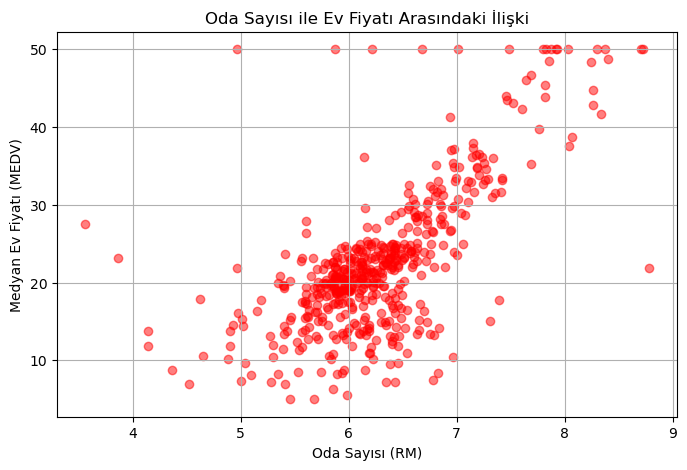

In [97]:
plt.figure(figsize=(8, 5))
plt.scatter(df['RM'], df['MEDV'], alpha=0.5, color='red')
plt.xlabel("Oda Sayısı (RM)")
plt.ylabel("Medyan Ev Fiyatı (MEDV)")
plt.title("Oda Sayısı ile Ev Fiyatı Arasındaki İlişki")
plt.grid(True)
plt.show()

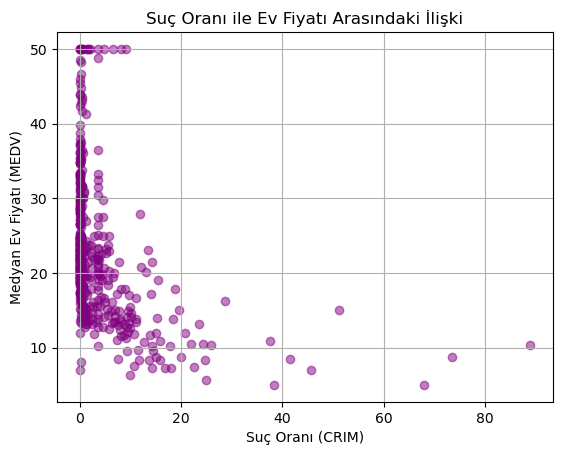

In [115]:
plt.scatter(df['CRIM'], df['MEDV'], alpha=0.5, color='purple')
plt.xlabel("Suç Oranı (CRIM)")
plt.ylabel("Medyan Ev Fiyatı (MEDV)")
plt.title("Suç Oranı ile Ev Fiyatı Arasındaki İlişki")
plt.grid(True)
plt.show()


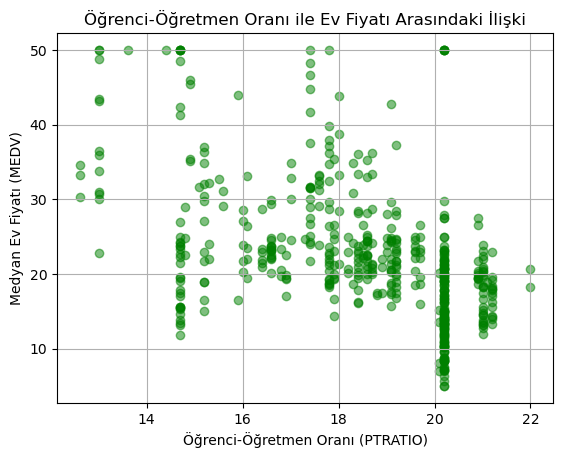

In [117]:
plt.scatter(df['PTRATIO'], df['MEDV'], alpha=0.5, color='green')
plt.xlabel("Öğrenci-Öğretmen Oranı (PTRATIO)")
plt.ylabel("Medyan Ev Fiyatı (MEDV)")
plt.title("Öğrenci-Öğretmen Oranı ile Ev Fiyatı Arasındaki İlişki")
plt.grid(True)
plt.show()


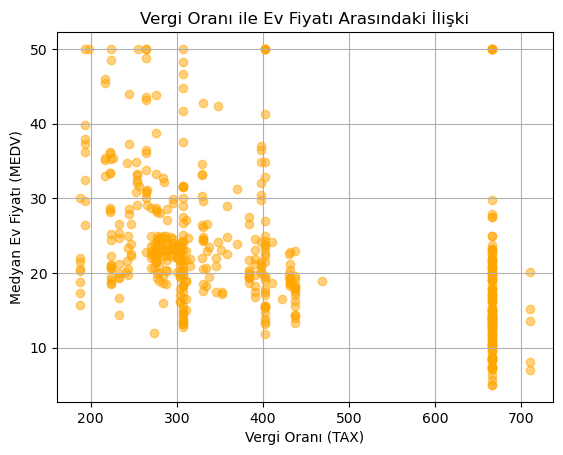

In [121]:
plt.scatter(df['TAX'], df['MEDV'], alpha=0.5, color='orange')
plt.xlabel("Vergi Oranı (TAX)")
plt.ylabel("Medyan Ev Fiyatı (MEDV)")
plt.title("Vergi Oranı ile Ev Fiyatı Arasındaki İlişki")
plt.grid(True)
plt.show()


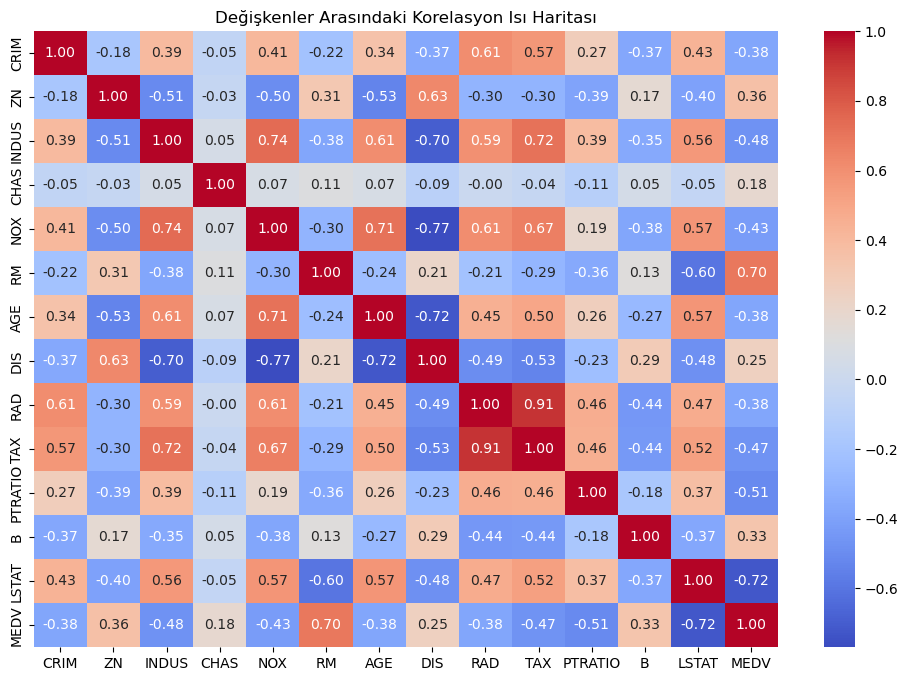

In [123]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Değişkenler Arasındaki Korelasyon Isı Haritası")
plt.show()


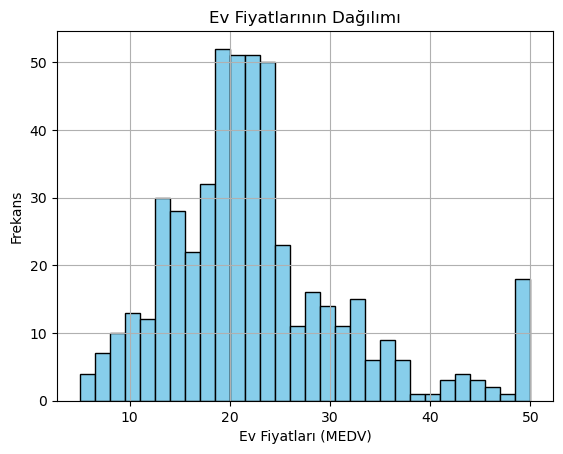

In [125]:
df['MEDV'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Ev Fiyatları (MEDV)")
plt.ylabel("Frekans")
plt.title("Ev Fiyatlarının Dağılımı")
plt.show()


In [98]:
cleaned_file_path

'Boston_Housing_Cleaned.csv'